# Clustering o agrupamiento (I)

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.dpi'] = 120

## Dataset artificial

*Crearemos un dataset artificial para entender el concepto*

In [6]:
# Crear dataset artificial
from sklearn.datasets import make_blobs
X,Y =make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True)

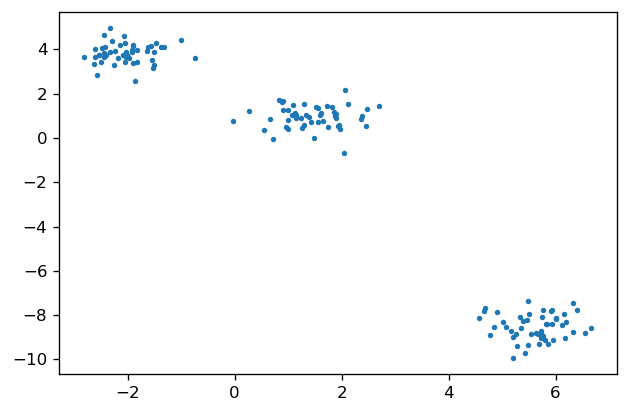

In [11]:
# Graficación
plt.scatter(X[:,0],X[:,1],s=5)


## Agrupamiento por K-Means

In [19]:
# Importar librería
from sklearn.cluster import KMeans

# Instanciar el modelo
km = KMeans(n_clusters=3,init="random",n_init=10,max_iter=300,tol=1e-4)

# Predicción de los clústeres
y_km =km.fit_predict(X)

In [22]:
# Centroides de los clústeres 
km.cluster_centers_

array([[ 5.62028137, -8.52614658],
       [ 1.45642568,  0.95577086],
       [-2.02531412,  3.83239935]])

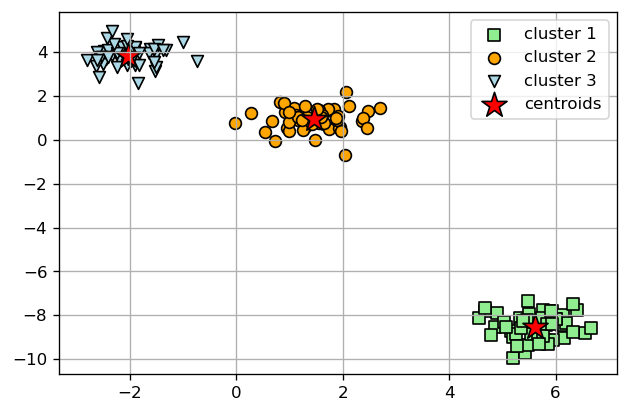

In [23]:
# Graficación 
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black',label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black',label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [24]:
# Distorsión
km.inertia_

77.67204180368086

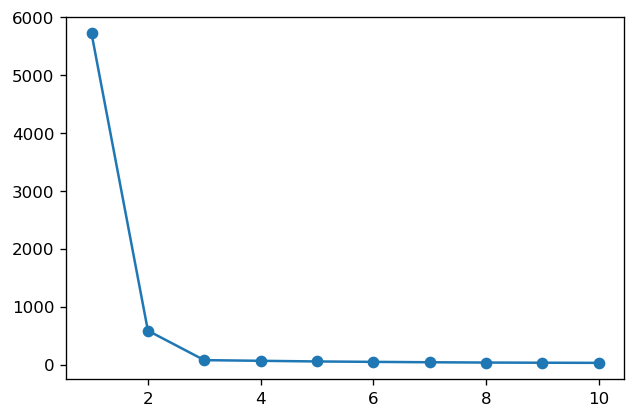

In [26]:
# Determinación del método del codo (elbow) para determinar el número de clústeres
dist=[]
for i in range(1,11):
    kms=KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=100)
    kms.fit(X)
    dist.append(kms.inertia_)
plt.plot(range(1,11),dist,marker="o")


## Agrupamiento por DBSCAN
### *Density-based Spatial Clustering of Applications with Noise* 

In [28]:
# Importar librería
from sklearn.cluster import DBSCAN

# Instanciar el modelo

db = DBSCAN(eps=0.2,min_samples=5,metric="euclidean")

# Predecir los clústeres

y_db =db.fit_predict(X)
y_db

array([-1, -1, -1, -1,  0, -1,  0, -1,  1,  1, -1, -1,  0, -1,  2,  2,  2,
        2, -1, -1, -1, -1,  2, -1, -1, -1, -1,  2, -1, -1, -1, -1,  0,  1,
        2, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  3,  1,  3,  2, -1, -1, -1, -1, -1, -1, -1, -1,  3,  2, -1,  1,
       -1, -1,  3, -1, -1,  3,  0,  3, -1, -1, -1, -1, -1,  1,  3, -1, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  3, -1, -1,
       -1, -1, -1, -1,  2, -1, -1,  2, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [29]:
# Imprimir el número estimado de clústeres
tags = db.labels_
nC= len(set(tags)) - (1 if -1 in tags else 0)
nC

4

In [ ]:
# Imprimir el número de puntos ruido


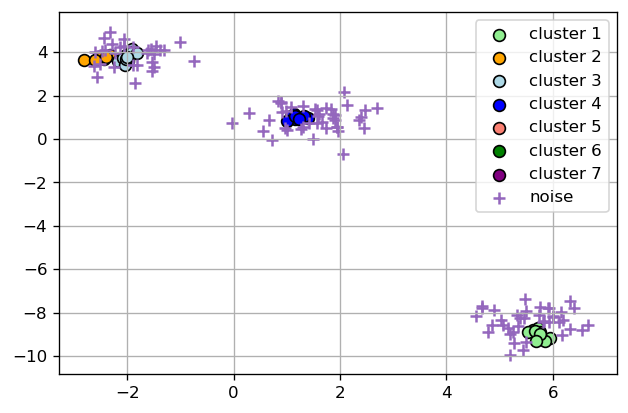

In [30]:
# Graficar
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], s=50, c='lightgreen', marker='o', edgecolor='black',label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_db == 2, 0], X[y_db == 2, 1], s=50, c='lightblue', marker='o', edgecolor='black',label='cluster 3')
plt.scatter(X[y_db == 3, 0], X[y_db == 3, 1], s=50, c='blue', marker='o', edgecolor='black',label='cluster 4')
plt.scatter(X[y_db == 4, 0], X[y_db == 4, 1], s=50, c='#FA8072', marker='o', edgecolor='black', label='cluster 5')
plt.scatter(X[y_db == 5, 0], X[y_db == 5, 1], s=50, c='green', marker='o', edgecolor='black',label='cluster 6')
plt.scatter(X[y_db == 6, 0], X[y_db == 6, 1], s=50, c='purple', marker='o', edgecolor='black',label='cluster 7')
plt.scatter(X[y_db == -1, 0], X[y_db == -1, 1], s=50, c='#9467bd', marker='+', edgecolor='black',label='noise')
plt.legend(scatterpoints=1, loc = 0)
plt.grid()
plt.show()